In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df_train = pd.read_csv('Decision_Tree_bankloan-train.csv')
df_test = pd.read_csv("Decision_Tree_bankloan-test.csv")

In [26]:
len(df_train)

15

In [27]:
len(df_test)

7

In [28]:
df_train.head()

,Age,Has_job,Own_house,Credit_rating,Outcome
0,young,False,False,fair,No
1,young,False,False,good,No
2,young,True,False,good,Yes
3,young,True,True,fair,Yes
4,young,False,False,fair,No


In [29]:
df_test.head()

,Age,Has_job,Own_house,Credit_rating,Outcome
0,young,False,False,fair,No
1,young,False,False,good,No
2,young,True,False,good,Yes
3,young,True,True,fair,Yes
4,young,False,False,fair,No


In [30]:
type(df_train['Has_job'][0])

numpy.bool_

In [31]:
df_train['Has_job'].unique()

array([False,  True])

In [32]:
df_train['Credit_rating'].unique()

array(['fair', 'good', 'excellent'], dtype=object)

In [33]:
df_train['Age'].unique()

array(['young', 'middle', 'old'], dtype=object)

### Convert bool into string bool

In [34]:
boolDict = {
    True: 'True',
    False: "False"
}

def conversion(x):
    if x in boolDict:
        return boolDict[x]
    else:
        return np.nan
    

for i in [1,2]:
    df_train.iloc[:, i] = df_train.iloc[:,i].apply(conversion)
    df_test.iloc[:,i] = df_test.iloc[:,i].apply(conversion)

In [35]:
dictionary = {
    'True' : 1,
    'False' : 0,
    'fair': 0,
    'good': 1,
    'excellent': 2,
    'young':0,
    'middle':1,
    'old':2,
    'Yes':1,
    'No':0
}

In [36]:
def data_conversion(x):
    if x in dictionary:
        return dictionary[x]
    return np.nan

for i in range(5):
    df_train.iloc[:, i] = df_train.iloc[:, i].apply(data_conversion)
    df_test.iloc[:,i] = df_test.iloc[:,i].apply(data_conversion)

In [39]:
x_train = df_train.iloc[:, :4]
y_train = df_train['Outcome']
x_test = df_test.iloc[:, :4]
y_test = df_test['Outcome']

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)

In [42]:
accuracy_score(y_test, y_pred)

1.0

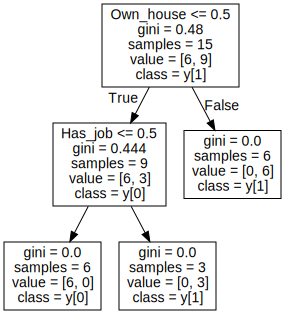

In [43]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names=x_train.columns))